In [ ]:
%tensorflow_version 2.x
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  #load dataset
print(fashion_mnist)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()              #split into training and testing

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
type(train_images)

(60000, 28, 28)


numpy.ndarray

Lets have a look at one pixel

In [ ]:
train_images[0, 23, 23] 

194

In [ ]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
train_labels[:10] #Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

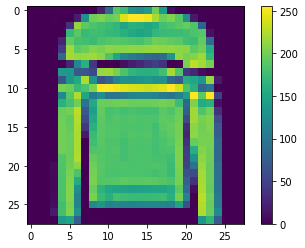

In [ ]:
plt.figure()
plt.imshow(train_images[5])    #change the value of train_images to get more t shirts
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0    #preprocessing the data

test_images = test_images / 255.0

#Building the model

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),   #input layer 1
                          keras.layers.Dense(128, activation="relu"),   #hidden layer 2
                          keras.layers.Dense(10, activation="softmax")   #output layer 3
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and we can this part is training the model.

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2287 - accuracy: 0.9139


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)    #verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.

print('Test accuracy:', test_acc)  #lets see the overfitting 

313/313 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8803
Test accuracy: 0.880299985408783


In [ ]:
# by decreaseing the epochs we dropped the overfitting a little bit

In [ ]:
predictions = model.predict(test_images)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
predictions[0]

array([1.5712544e-08, 7.9374292e-11, 1.7233440e-11, 2.5116880e-14,
       7.9420065e-10, 4.0496649e-05, 1.8904937e-07, 2.2653660e-03,
       3.3139415e-07, 9.9769360e-01], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))

9


## Verifying Predictions

Pick a number: 44


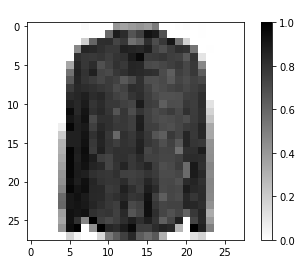

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
